In [ ]:
# array sum
import numpy as np
a = np.array([3, -5, 8, 12, 56, -17, 14])
a.reshape(max(a.shape),1)
print(a.shape)
total = 0
for i in range(0, a.shape[0]):
  total = total + a[i]
print('The sum is ' + str(total))

(7,)
The sum is 71


In [ ]:
# absolute value
x = -5.6
if (x < 0):
  x = -x
print('x: ' + str(x))

x: 5.6


In [ ]:
perc = 0.91
if perc > 0.95:
  print('A')
elif perc > 0.90:
  print('A-')
elif perc > 0.70:
  print('Pass')
else:
  print('Aargh!')


A-


In [ ]:
perc = 0.8
if perc > 0.00:
  print('Aargh!')
elif perc > 0.70:
  print('Pass')
elif perc > 0.90:
  print('A-')
else:
  print('A')

Aargh!


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.8 MB/s eta 0:00:00
(128, 128, 3) uint8


""

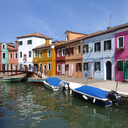

(512, 512) uint8


""

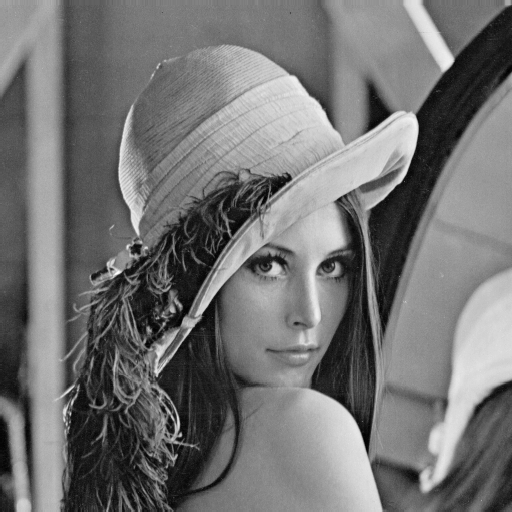

In [ ]:
!pip install -q mediapy
import mediapy as media
import numpy as np

image_rgb = media.read_image('https://github.com/hhoppe/data/raw/main/image.png')
print(image_rgb.shape, image_rgb.dtype)  # It is a numpy array.
media.show_image(image_rgb)

image_gray = \
media.read_image('https://drive.google.com/uc?export=download&\
confirm=yes&id=1U-VRah1J45ep60J4EEyB_hBBlfu_DW1g')
print(image_gray.shape, image_gray.dtype)  # It is a numpy array.
media.show_image(image_gray)


""

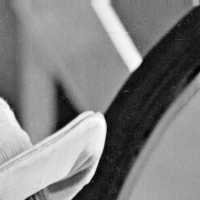

""

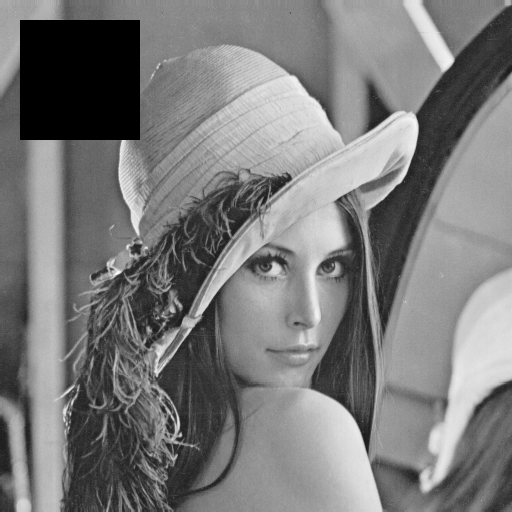

""

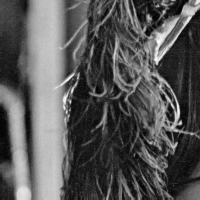

""

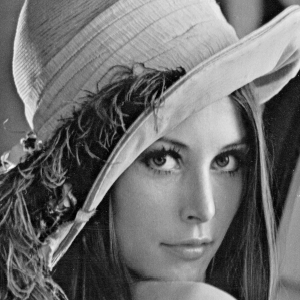

In [ ]:
image_gray = \
media.read_image('https://drive.google.com/uc?export=download&\
confirm=yes&id=1U-VRah1J45ep60J4EEyB_hBBlfu_DW1g')

top_right = image_gray[0:200,312:512]
media.show_image(top_right)

square = np.array(image_gray[:,:])

square[20:140,20:140]=np.zeros((120,120),dtype='uint8')
media.show_image(square)

bottom_left = image_gray[312:512,0:200]
media.show_image(bottom_left)

center_square= image_gray[106:406,106:406]
media.show_image(center_square)


""

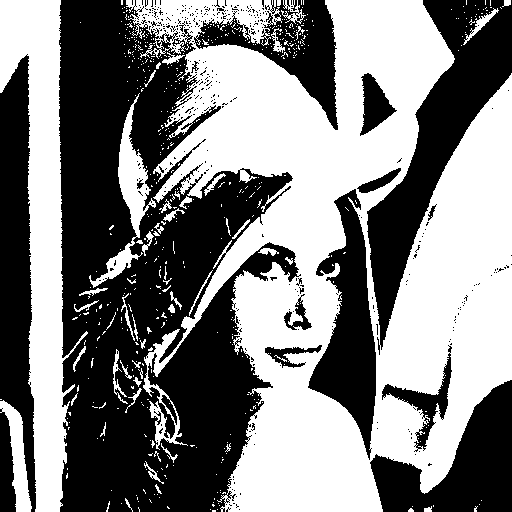

In [ ]:
[height, width] = image_gray.shape

output = np.zeros(image_gray.shape,dtype='uint8')

for i in range(0,height):
  for j in range(0,width):
    if (image_gray[i,j] > 128):
      output[i,j] = 255

media.show_image(output)


(416, 740, 3) uint8


""

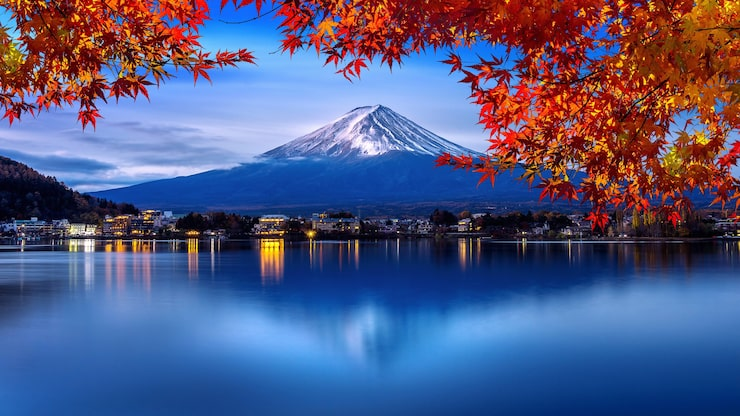

""

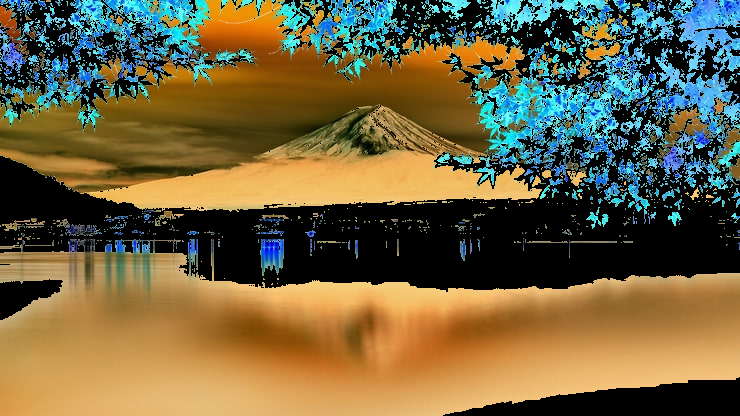

In [ ]:
image_rgb = media.read_image('https://img.freepik.com/free-photo/fuji-mountain-kawaguchiko-lake-morning-autumn-seasons-fuji-mountain-yamanachi-japan_335224-102.jpg?semt=ais_hybrid&w=740&q=80')
print(image_rgb.shape, image_rgb.dtype)  # It is a numpy array.
media.show_image(image_rgb)

output = np.zeros(image_rgb.shape,dtype='uint8')

[height, width, channels] = image_rgb.shape
"""
for i in range(0,height):
  for j in range(1,width):
    if (image_rgb[i,j] > 128).any(axis=2):
      output[i,j] = 255
"""
mask = (image_rgb > 128).any(axis=2)
output[mask] = 255 - image_rgb[mask] #invert colours where mask is true

media.show_image(output)

""

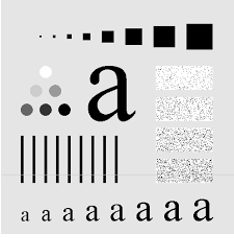

""

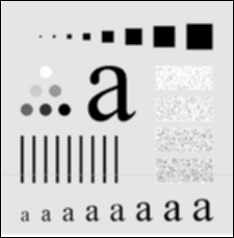

In [ ]:
image_gray = \
media.read_image('https://drive.google.com/uc?export=download&\
confirm=yes&id=1oG1LYW86HXWt0QoOuAF4j6NnX5KEHevC')

media.show_image(image_gray)
[height, width] = image_gray.shape

output = np.zeros(image_gray.shape,dtype='uint8')
winsize = 3
half_win = 1 # window is 3x3, starts from i-1 to i+1 (included)

# loop works only for 3x3 filter
for i in range(half_win,height- half_win):   #start with 1 pixel inward and 1 pixel before the last one, to avoid overflow.
  for j in range(half_win,width- half_win):
    window = image_gray[i- half_win:i+ half_win+1, j-half_win:j+ half_win+1]
    output[i,j] = np.sum(window.flatten())/(winsize*winsize)

media.show_image(output)


""

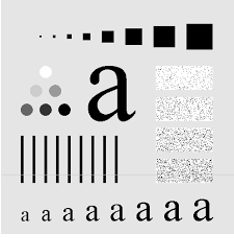

""

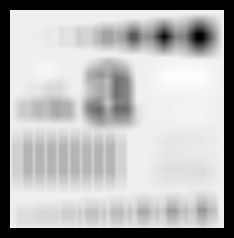

In [ ]:
image_gray = \
media.read_image('https://drive.google.com/uc?export=download&\
confirm=yes&id=1oG1LYW86HXWt0QoOuAF4j6NnX5KEHevC')

media.show_image(image_gray)
[height, width] = image_gray.shape

output = np.zeros(image_gray.shape,dtype='uint8')
winsize = 21
half_win = 10 # window is 3x3, starts from i-1 to i+1 (included)

# loop works only for 3x3 filter
for i in range(half_win,height- half_win):   #start with 1 pixel inward and 1 pixel before the last one, to avoid overflow.
  for j in range(half_win,width- half_win):
    window = image_gray[i- half_win:i+ half_win+1, j-half_win:j+ half_win+1]
    output[i,j] = np.sum(window.flatten())/(winsize*winsize)

media.show_image(output)

""

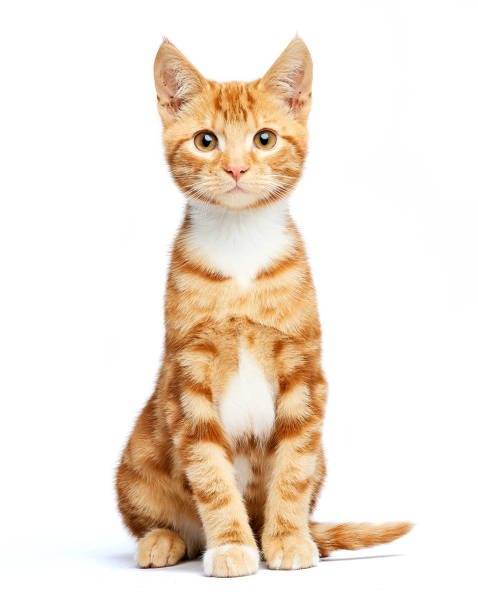

""

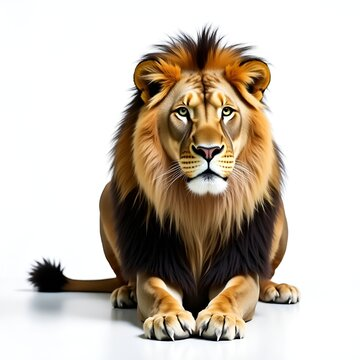

""

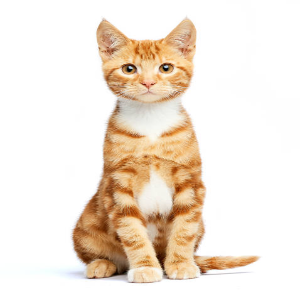

""

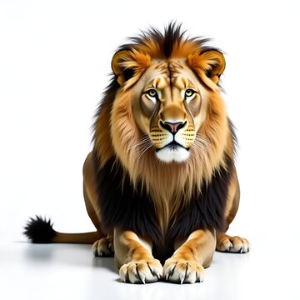

""

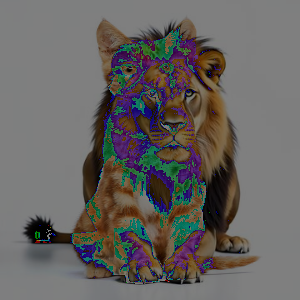

In [ ]:
import cv2

#image morphing
cat = \
media.read_image('https://media.istockphoto.com/id/1127210999/photo/adorable-ginger-red-tabby-kitten-sitting-curious-and-isolated-on-white-background.jpg?s=612x612&w=0&k=20&c=Jv4b5LPHMX_mz-1cAF-WoTHNKQ-ARZz3-8yQsKhot74=')
media.show_image(cat)

lion = \
media.read_image('https://t4.ftcdn.net/jpg/15/80/86/61/360_F_1580866174_5RTX8ENrYd7PRCJbB8i0YmoNrW4Wcj0Z.jpg')
media.show_image(lion)

#reading images and resizing it
image_cat = cv2.resize(cat, (300, 300))
image_lion = cv2.resize(lion, (300, 300))
media.show_image(image_cat)
media.show_image(image_lion)

#image morphing
blend = (image_cat+image_lion)/2
blend=blend.astype('uint8')

media.show_image(blend)

